In [22]:
import numpy as np
import pandas as pd
# from pandas import Series, DataFrame 
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, validation_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from xgboost import XGBClassifier
import lightgbm as ltb
# from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import joblib
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
pd.set_option('display.width', 10000)

In [15]:
df=pd.read_csv("d_encoded.csv")

In [16]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,LEVEL,EXPERIENCE,SALARY_AVG_TL,POSITION_CTO,POSITION_DATA SCIENTIST,POSITION_DATABASE ADMIN,POSITION_DEVOPS ENGINEER,POSITION_EMBEDDED SOFTWARE DEVELOPER,POSITION_FRONT-END DEVELOPER,POSITION_FULL STACK DEVELOPER,...,COMPANY_Startup,COMPANY_Yazılım & Teknoloji,WORK_TYPE_Geçici Remote,WORK_TYPE_Hibrit,WORK_TYPE_Ofis,WORK_TYPE_Remote,CITY_yurt_ici,CURRENCY_£ - Sterlin,CURRENCY_€ - Euro,CURRENCY_₺ - Türk Lirası
0,1,2,15499,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
1,0,0,8499,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
2,1,1,15499,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,0,1,10499,0,0,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
4,0,0,5499,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [4]:
#Verilerin dağılımının normal dağılım gösterip göstermediğini belirlemenin bir diğer yolu ortalama, mod ve medyan değerlerine bakmaktır. 
#Normal dağılımda bu değerler çakışıktır. Bu istatistikler birbirine yaklaştığı ölçüde dağılım normal dağılıma yaklaşır. 
#Birbirinden uzaklaştığı ölçüde dağılım çarpıklaşır.

In [6]:
df["SALARY_AVG_TL"].describe()

count      5026.000000
mean      24195.556307
std       29521.804670
min        5499.000000
25%       10499.000000
50%       15499.000000
75%       24499.000000
max      236868.000000
Name: SALARY_AVG_TL, dtype: float64

In [7]:
df["SALARY_AVG_TL"].mean()

24195.556307202547

In [8]:
df["SALARY_AVG_TL"].mode()

0    5499
Name: SALARY_AVG_TL, dtype: int64

In [9]:
df["SALARY_AVG_TL"].median()

15499.0

In [10]:
#  mod < median <mean  oldugundan verimiz saga carpık

In [17]:
#sayısal degiskenleri özetlemek icin fonk
def num_summary(dataframe, numerical_col, plot=True):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

                count          mean          std     min      5%     10%     20%      30%      40%      50%      60%      70%      80%      90%      95%       99%       max
SALARY_AVG_TL  5026.0  24195.556307  29521.80467  5499.0  5499.0  6499.0  9499.0  11499.0  13499.0  15499.0  18499.0  22499.0  27935.0  46565.0  68135.0  195605.0  236868.0


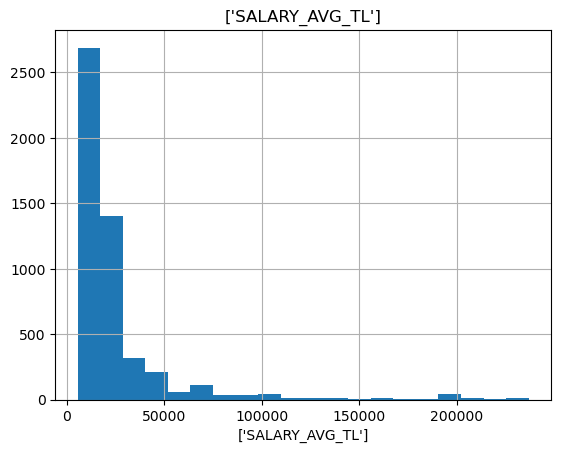

In [18]:
num_summary(df,["SALARY_AVG_TL"])

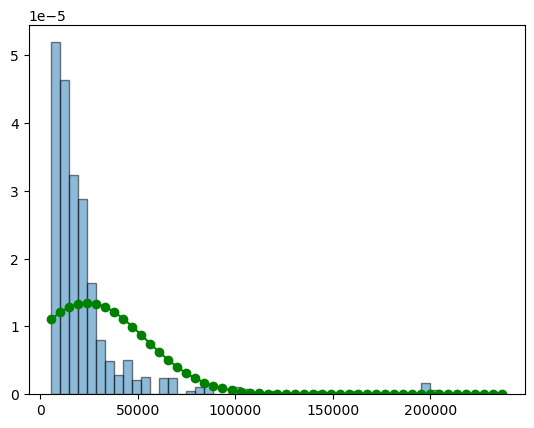

In [23]:
# Histogram plot parametreleri
_, bins, _ = plt.hist(df["SALARY_AVG_TL"], bins = 50,
                      density = 1, alpha = 0.5,
                      ec= 'black' )

# Çan eğrisi için en uygun değerler
mu, sigma = stats.norm.fit(df["SALARY_AVG_TL"])
best_fit_line = stats.norm.pdf(bins, mu, sigma)

# Çan eğrisi gösterimi
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("")
plt.ylabel("")
plt.show()

In [19]:
#grafik saga carpık 

In [24]:
#degiskenleri standartlaştırmadan önce çarpıklıga bakmamız gerek
#SKEWNESS
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column],color = "g")
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return


SALARY_AVG_TL's: Skew: 4.071523196748145, : SkewtestResult(statistic=54.7354247515767, pvalue=0.0)


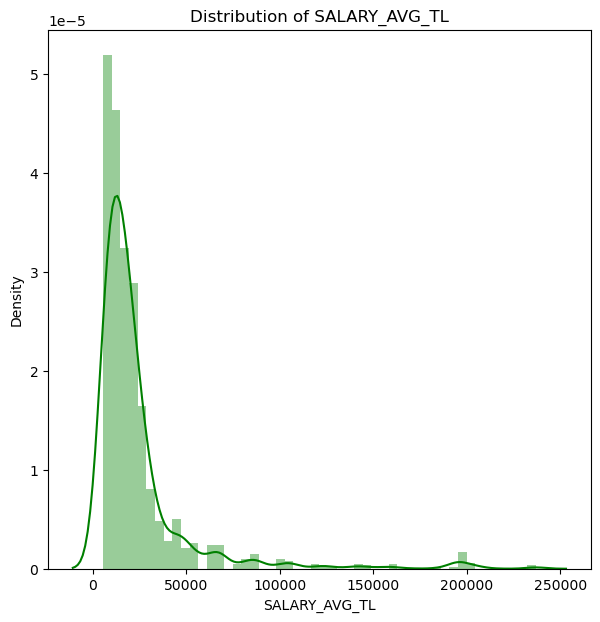

In [25]:
plt.figure(figsize=(7, 7))

check_skew(df,'SALARY_AVG_TL')
plt.show()